# Исследование рынка продажи игр

**Цели исследования:**
1. Выбрать актуальный период для построения гипотез на 2017 год.
2. Понять, какие платформы наиболее перспективны.
3. Выяснить, различаются ли предпочтения пользователей из разных регионов в выборе игровой платформы, жанра игр.
3. Составить прогноз на 2017 год.

**Ход исследования:**
1. Импорт необходимых для исследования модулей.
2. Обзор данных, полученных из файла `/datasets/games.csv`, описание явных проблем.
3. Предобработка данных, проверка данных на наличие ошибок (пропуски, дубликаты, аномальные значения), их влияния на исследование, поиск путей ипсравления ошибок.
4. Подсчет суммарной продажи во всех регионах.
5. Исследовательский анализ данных.
6. Визуализация портрета пользователя каждого региона.
7. Проверка гипотез.
8. Подведение итогов.

### Шаг 1. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(font_scale=1.1, palette='viridis')  # код, увеличивающий размер шрифта на осях в графиках

### Шаг 2.  Обзор данных

In [3]:
# Выгрузка данных
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


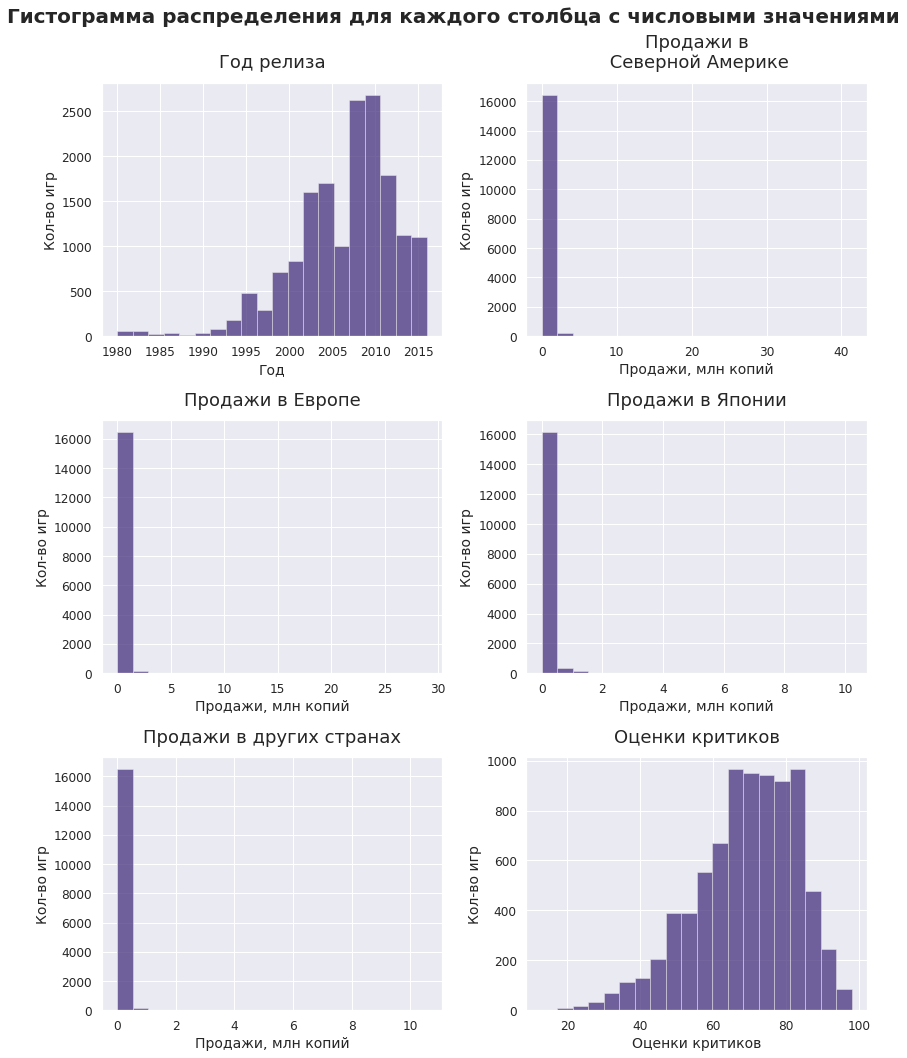

In [5]:
f, axes = plt.subplots(3,2, figsize=(12, 15))
ax = axes.ravel()
title_list = ['Год релиза', 'Продажи в\n Северной Америке', 'Продажи в Европе', 'Продажи в Японии', 'Продажи в других странах', 'Оценки критиков']
label_list = ['Год', 'Продажи, млн копий', 'Продажи, млн копий', 'Продажи, млн копий', 'Продажи, млн копий', 'Оценки критиков']
x_axis =  ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']    
for i in range(6):
#     f, axes = plt.subplots(2,3, figsize=(10, 10))
#     ax = axes.ravel()
    (sns.histplot(
        data=data,
        x=x_axis[i],
        bins=20,
        ax=ax[i],
        edgecolor='.9',
        linewidth=.5)
        .set_title(title_list[i], loc='center', fontsize=18, pad=15)
    )
    ax[i].set_ylabel('Кол-во игр', fontsize=14)
    ax[i].set_xlabel(label_list[i], fontsize=14)
plt.suptitle('Гистограмма распределения для каждого столбца с числовыми значениями', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show();

**Вывод:**

Я ознакомилась с данными из выгруженного датафрейма.

Я вижу  явные проблемы в данных:
- названия столбцов необходиом привести в нижний регистр;
- практически в каждом столбце есть пропуски, следует более детально разобраться в данных и решить, как эти пропуски обработать;
- в столбцах о продажах в разных регионах содержатся выбросы, это видно на соответсвующих гистограммах;
- в некоторых столбцах следует изменить тип данных.

Далее, на стадии предобработки данных, я детально исследую данные на наличие дубликатов, аномальных значений, решу, как следует обработать пропуски в разных столбцах.

### Шаг 3. Предобработка данных

Для удобства я перевела названия в "змеиный регистр".

In [6]:
# я привела названия всех столбцов в нижний регистр
data.columns = data.columns.str.lower()  
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В столбцах `name` и `genre` есть 2 пропущенных значения. Заполнить пропуски невозможно, а без этих значений строки не информативны, поэтому я решила удалить их.

In [7]:
# смотрю срез данных с пропусками в столбце name
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
print(data['name'].isna().sum(), data['genre'].isna().sum(), sep='\n')

2
2


In [9]:
data.dropna(subset=['name'], inplace=True)
print(data['name'].isna().sum(), data['genre'].isna().sum(), sep='\n')

0
0


In [10]:
data.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверяю уникальные значения в столбце `platform` на наличие возможных неявных дубликатов.

In [11]:
data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбце `genre` со значениями все в порядке.

В столбце `year_of_release`  присутствуют пропуски. Заполнить пропуски невозможно, доля пропущенных строк от общего числа строк равна 0.16, поэтому я решила их удалить.
Возможные причины появления пропусков в столбце  `year_of_release`:
- техническая ошибка в сборе данных, потеря части данных;
- в источниках, из которых собрались данные, не было информации о годе выпуска игры;

В столбце `year_of_release` хранятся данные о годе выпуска игры, значит, по смыслу в данном столбце должны храниться целочисленные значения, поэтому я решила заменить тип данных с `float`  на `Int32`.

In [12]:
print(data['year_of_release'].isna().sum())  # считаю кол-во пропусков

269


In [13]:
data['year_of_release'].isna().sum() / data['year_of_release'].count()  # считаю долю пропусков

0.016358550231087326

In [14]:
data = data.query('year_of_release >= 0')
data['year_of_release'] = data['year_of_release'].astype('Int32')  # изменение типа данных
data.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.5+ MB


In [15]:
# Функция, создающая графики для проверки аномальных значений
def make_plots(title_1, title_2, column, x_lable, y_lable, bins=100):
    # Строю боксплот
    f, ax = plt.subplots(figsize=(8, 4))
    sns.despine(f)
    (sns.boxplot(
        y=column, 
        data=data)
        .set_title(title_1, loc='center', fontsize=16, pad=15)
    )
    sns.despine(offset=15, trim=True)
    ax.set_ylabel(x_lable, fontsize=14)
    ax.set_xlabel('')
    plt.show()

    # Строю гистограмму
    f, ax = plt.subplots(figsize=(8, 4))
    sns.despine(f)
    (sns.histplot(
        data,
        x=column,
        bins=bins,
        multiple='stack',
        edgecolor='.9',
        linewidth=.5)
        .set_title(title_2, loc='center', fontsize=16, pad=15)
    )
    ax.set_ylabel(y_lable, fontsize=14)
    ax.set_xlabel(x_lable, fontsize=14)
    plt.show()

Проверяю, есть ли в столбце `year_of_release` аномальные значения.

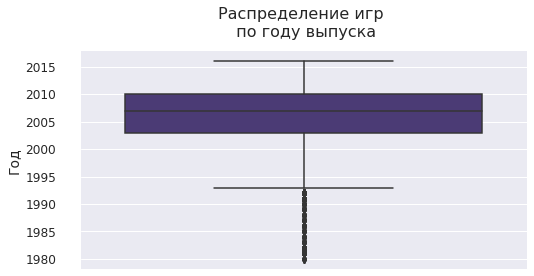

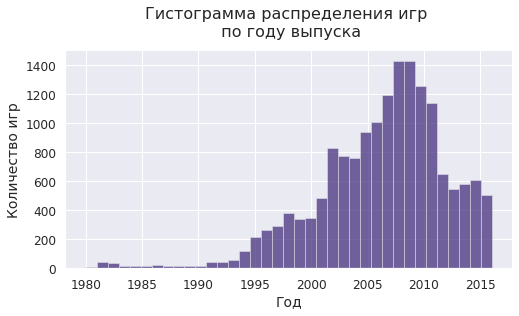

In [16]:
make_plots('Распределение игр \n по году выпуска', 'Гистограмма распределения игр \n по году выпуска', 'year_of_release', 'Год', 'Количество игр', bins=37)

В датафрейме представлены данные по играм, выпущенным в промежуток с 1980 по 2016 год.

На боксплоте и гистограмме видно, что аномальных значений нет.

Проверяю уникальные значения в столбце `genre` на наличие возможных неявных дубликатов.

In [17]:
data['genre'].unique()  

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В столбце `genre` со значениями все в порядке.

Я смотрю, как распределены данные в столбцах с информацией о продажах игр в разных регионах.

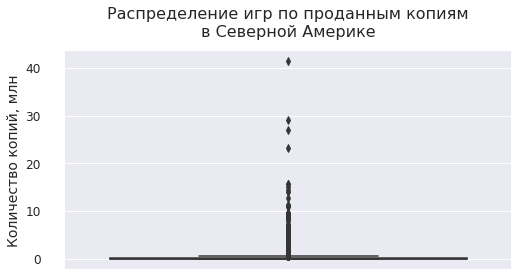

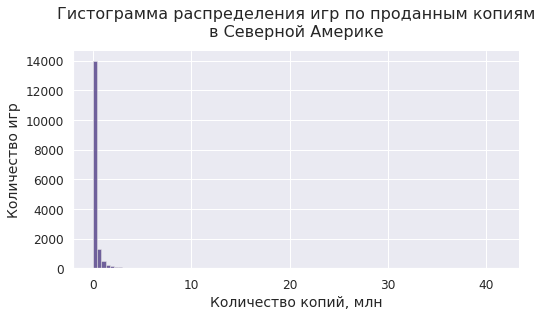

In [18]:
# Распределение игр по проданным копиям в Северной Америке
(make_plots('Распределение игр по проданным копиям\nв Северной Америке', 
            'Гистограмма распределения игр по проданным копиям\nв Северной Америке',
            'na_sales', 'Количество копий, млн', 'Количество игр')
)

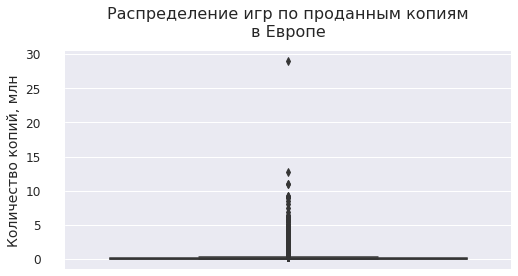

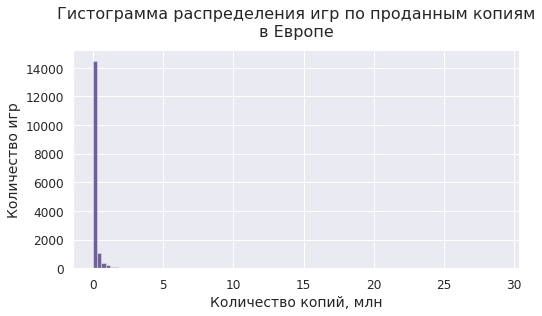

In [19]:
# Распределение игр по проданным копиям в Европе
(make_plots('Распределение игр по проданным копиям\nв Европе', 
            'Гистограмма распределения игр по проданным копиям\nв Европе',
            'eu_sales', 'Количество копий, млн', 'Количество игр')
)

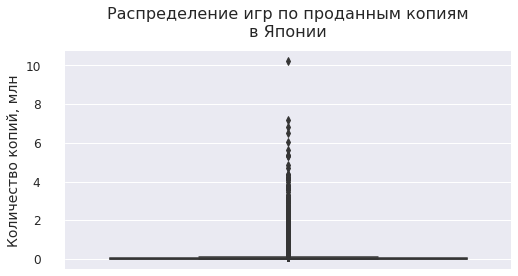

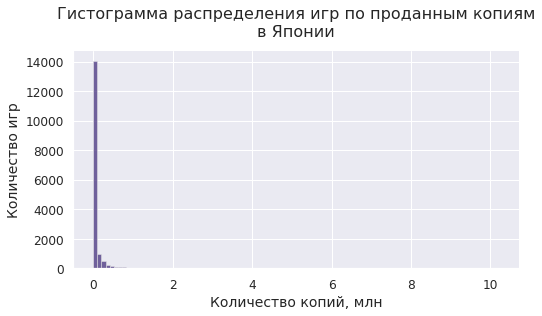

In [20]:
# Распределение игр по проданным копиям в Японии
(make_plots('Распределение игр по проданным копиям\nв Японии', 
            'Гистограмма распределения игр по проданным копиям\nв Японии',
            'jp_sales', 'Количество копий, млн', 'Количество игр')
)

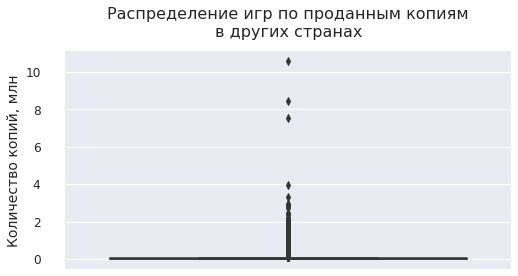

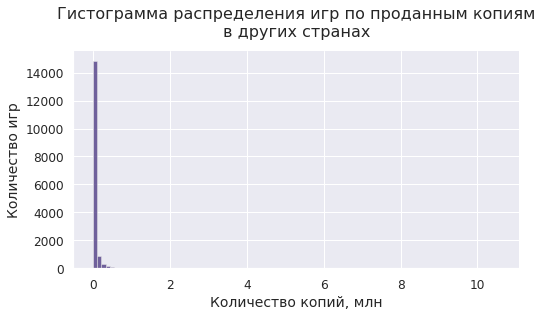

In [21]:
# Распределение игр по проданным копиям в других странах
(make_plots('Распределение игр по проданным копиям\nв других странах',
            'Гистограмма распределения игр по проданным копиям\nв других странах',
            'other_sales', 'Количество копий, млн', 'Количество игр')
)

Несмотря на то, что в столбцах с данными о продажах в каждом регионе есть аномально большие значения, удалять их нельзя, так как потеряются данные по продажам.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.5+ MB


Я решила заменить тип данных с `float64` на `float32`, чтобы немного уменьшить размер датафрейма.

In [23]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = (
    data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].astype('float32')
)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int32(1), float32(4), float64(1), object(5)
memory usage: 1.2+ MB


Я решила посмотреть, какие уникальные значения содержатся в столбце `critic_score`. Так как все уникальные значения не имеют цифр после запятой, можно изменить тип данных с `float` на `Int32`.

In [24]:
data['critic_score'].unique()  # смотрю, какие уникальные значения содержатся в столбце

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [25]:
data['critic_score'] = data['critic_score'].astype('Int32')  # изменяю тип данных
data.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   Int32  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int32(2), float32(4), object(5)
memory usage: 1.2+ MB


In [26]:
data['critic_score'].isna().sum()  # считаю кол-во пропусков

8461

Так же, в столбце `critic_score` больше половины пропущенных значений. Заполнить пропуски не представляется возможным, поэтому я оставляю все, как есть.

Причин в том, почему могли появиться пропуски в данном столбце, несколько:

- техническая ошибка в сборе данных, потеря части данных;
- возможно, некоторые игры недостаточно популярны, чтобы их могли оценить критики;
- в источниках, из которых собрались данные, не было информации об оценках критиков;

Я решила посмотреть, какие уникальные значения содержатся в столбце `user_score`. 

In [27]:
data['user_score'].unique()  # смотрю, какие уникальные значения содержатся в столбце

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

По логике, в данном столбце должны храниться только числовые значения, но довольно часто встречается `tbd`.

`TBD (To Be Determined)` - это аббревиатура, которая  помогает быстро и эффективно передать информацию о том, что конкретный аспект еще не установлен и требует дополнительного решения или информации. В нашем контексте `tbd` - это отстутствие данных. Значит, можно заменить эти значения на пропуски (NaN).

In [28]:
data['user_score'].loc[data['user_score'] == 'tbd'].count()  # считаю кол-во 'tbd'

2376

In [29]:
data['user_score'].isna().sum()  # считаю кол-во пропусков до замены 'tbd' на NaN

6605

In [30]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan  # заменяю 'tbd' на NaN

In [31]:
print(data['user_score'].loc[data['user_score'] == 'tbd'].count()) # проверяю, заменены ли  'tbd' 
data['user_score'].isna().sum()  # считаю кол-во пропусков после замены 'tbd' на NaN

0


8981

Теперь можно заменить тип данных с `object` на `float32`

In [32]:
data['user_score'] = data['user_score'].astype('float32')  # изменяю тип данных
data.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   Int32  
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: Int32(2), float32(5), object(4)
memory usage: 1.1+ MB


Смотрю, сколько раз встречаются уникальные значения в столбце `rating`

In [33]:
data['rating'].value_counts()  # считаю кол-во каждого уникального значения

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Я изучила рейтинг от организации ESRB.  

`K-A for Kids to Adults` - это рейтинг для игр, содержащих контент, пригодный для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в `E`.

Так как рейтинги `K-A` и `E`по сути означают одно и то же, а строк с `K-A` мало, я думаю, что можно заменить `K-A` на `E`. 

In [34]:
data['rating'] = data['rating'].replace('K-A', 'E')  # замена K-A на E

In [35]:
data['rating'].value_counts() # проверяю кол-во каждого уникального значения после замены

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Считаю количесвто пропусков в столбце `rating`. Удалять такое количесвто строк не целесообразно, потеряется много данных. Я решила заменить пропуски на `unknown`.

Возможные причины пропусков:
- технический сбой;
- в источниках, из которых собрались данные, не было информации о возрастном рейтинге ESRB;
- некоторые платформы могут использовать другие рейтинги(`PEGI`, `PARS` и т.д.)

In [36]:
data['rating'].isna().sum()  # считаю кол-во пропусков

6676

In [37]:
data['rating'] = data['rating'].fillna('unknown')  # заменяю пропуски на unknown
data['rating'].head(10)

0          E
1    unknown
2          E
3          E
4    unknown
5    unknown
6          E
7          E
8          E
9    unknown
Name: rating, dtype: object

Проверяю данные на наличие дубликатов

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   Int32  
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: Int32(2), float32(5), object(4)
memory usage: 1.1+ MB


In [39]:
data.duplicated().sum()  # считаю кол-во явных дубликатов

0

In [40]:
# Проверяю, есть ли неявные дубликаты
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [41]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [42]:
data.info() # проверяю, удалены ли дубликаты
data[['name', 'platform', 'year_of_release']].duplicated(keep=False).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float32
 5   eu_sales         16443 non-null  float32
 6   jp_sales         16443 non-null  float32
 7   other_sales      16443 non-null  float32
 8   critic_score     7982 non-null   Int32  
 9   user_score       7462 non-null   float32
 10  rating           16443 non-null  object 
dtypes: Int32(2), float32(5), object(4)
memory usage: 1.1+ MB


0

**Вывод:**
1. Я привела названия столбцов к стандартному "змеиному" регистру.

2. Изменила тип данных, числовые значения перевела в 32-битный тип для уменьшения размера датафрейма.

3. В столбцах `name` и `genre` есть 2 пропущенных значения. Заполнить пропуски невозможно, а без этих значений строки не информативны, поэтому я решила удалить их.

4. Значения в `year_of_release` год релиза игр  с 1980 по 2016 год. Я построила боксплот и гистограмму, на которых видно, что аномальных значений нет. В столбце `year_of_release` присутствуют пропуски. Так как доля пропущенных строк от общего числа строк равна 0.16, я удалила строки. 
    Возможные причины появления пропусков в столбце  `year_of_release`:
    
    - техническая ошибка в сборе данных, потеря части данных;
    - в источниках, из которых собрались данные, не было информации о годе выпуска игры;   
    
    
5. В столбце `critic_score` много пропущенных значений. Заполнить пропуски не представляется возможным, поэтому я оставляю все, как есть. Причин в том, почему могли появиться пропуски в данном столбце, несколько:

    - техническая ошибка в сборе данных, потеря части данных;
    - возможно, некоторые игры недостаточно популярны, чтобы их могли оценить критики;
    - в источниках, из которых собрались данные, не было информации об оценках критиков;
    
    
6. Я изучила, какие уникальные значения встречаются в столбце `user_score`. По логике, в данном столбце должны храниться только числовые значения, но довольно часто встречается `tbd`. `TBD (To Be Determined)` - это аббревиатура, которая  помогает быстро и эффективно передать информацию о том, что конкретный аспект еще не установлен и требует дополнительного решения или информации. В нашем контексте `tbd` - это отстутствие данных. Поэтому я заменила `tbd` на пропуски. Изменила тип данных с `object` на `float32`. Возможные причины появления пропусков в данном столбце несколько:

    - техническая ошибка в сборе данных, потеря части данных;
    - в источниках, из которых собрались данные, не было информации об оценках пользователей;
    

7. Я посмотрела, сколько раз встречаются уникальные значения в столбце `rating`. Я изучила рейтинг от организации ESRB.  `K-A for Kids to Adults` - это рейтинг для игр, содержащих контент, пригодный для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в `E`. Так как рейтинги `K-A` и `E`по сути означают одно и то же, а строк с `K-A` мало, я думаю, что можно заменить `K-A` на `E`.  Так же, я почитала количесвто пропусков в столбце `rating`. Заменить пропуски невозможно, а удалять такое количесвто строк не целесообразно, потеряется много данных. Поэтому оставляю пропуски не заполненными. Возможные причины пропусков:

    - технический сбой;
    - в источниках, из которых собрались данные, не было информации о возрастном рейтинге ESRB.
    
    
8. Проверила данные на наличие явных дубликатов. Изучила уникальные значения в столбцах `genre`, `platform` и `year_of_release` на возможные неявные дубликаты и удалила их.


### Шаг 4. Подсчет суммарной продажи

In [43]:
# считаю общие продажи по всем регионам
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [44]:
data.head() # проверяю, появился ли столбец

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,<NA>,NaN,unknown,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,<NA>,NaN,unknown,31.380001


### Шаг 5. Исследовательский анализ данных

#### Распределение игр по году выпуска.

Чтобы оценить, сколько игр выпускалось в разные годы, я построю боксплот и гистограмму.

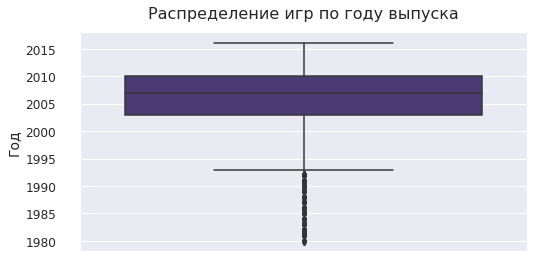

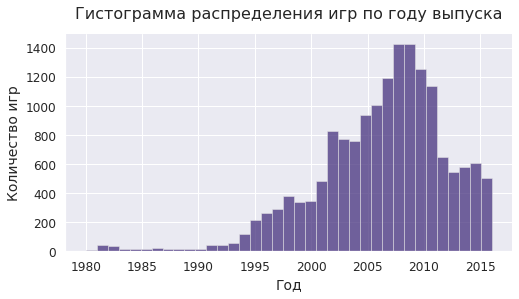

In [45]:
# Вызываю функцию, которая строит график распределения и гистограмму
(make_plots('Распределение игр по году выпуска', 
            'Гистограмма распределения игр по году выпуска', 
            'year_of_release', 
            'Год', 
            'Количество игр', 
            bins=37)
)

На боксплоте видно, что самым популярным годом для релиза игр был 2008 и 2009 годы, это видно и на гистограмме.

Вторая половина 2000-ых стала самой выдающейся в плане выпуска игр - выпускалось более 1000 игр в год, а в первую половину 2010-ых выпуск игр сильно сократился до 600 игр в год.

На мой взгляд, в данном исследовании важны данные за последние 5 лет, так как нам важен актуальная картина для прогнозирования тенденций на 2017 год. 

#### Как менялись продажи по платформам?

Я решила посмотреть, как менялись продажи по платформам каждый год. Для этого я построила тепловую карту сначала для всех платформ.

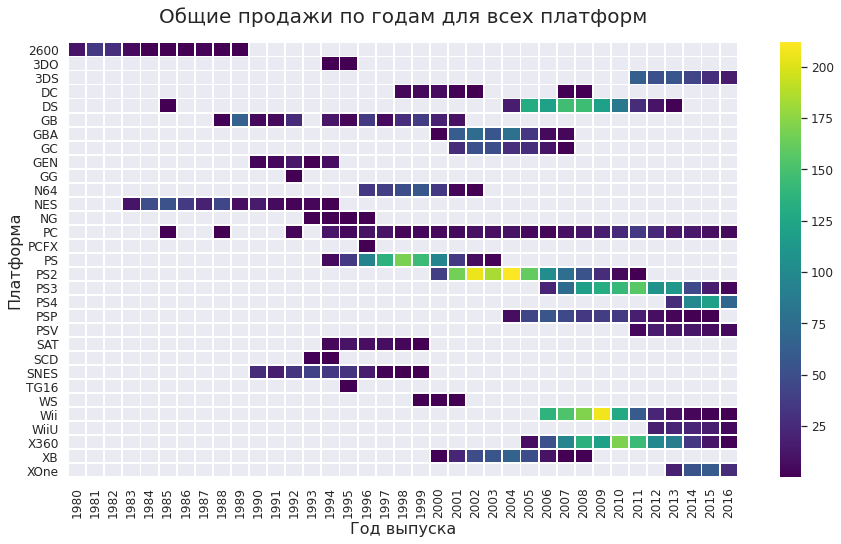

In [46]:
# строю тепловую карту общих продаж для всех платформ по годам
data_pivot = data.pivot_table(index='platform', values="total_sales", columns='year_of_release', aggfunc='sum')
f, ax = plt.subplots(figsize=(15, 8))
(sns.heatmap(data_pivot, ax=ax, 
             annot=False, 
             linewidths=.9, 
             cmap='viridis')
 .set_title('Общие продажи по годам для всех платформ', loc='center', fontsize=20, pad=20)
)
ax.set_ylabel('Платформа', fontsize=16)
ax.set_xlabel('Год выпуска', fontsize=16);

In [47]:
# Считаю средний срок жизни платформы
temp = data.copy() 
time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

График демонстрирует, в каком году на платформах начали и прекратили выпускать игры, сколько копий игр за год было продано.

Средняя продолжительность жизни платформы составляет 7 лет.

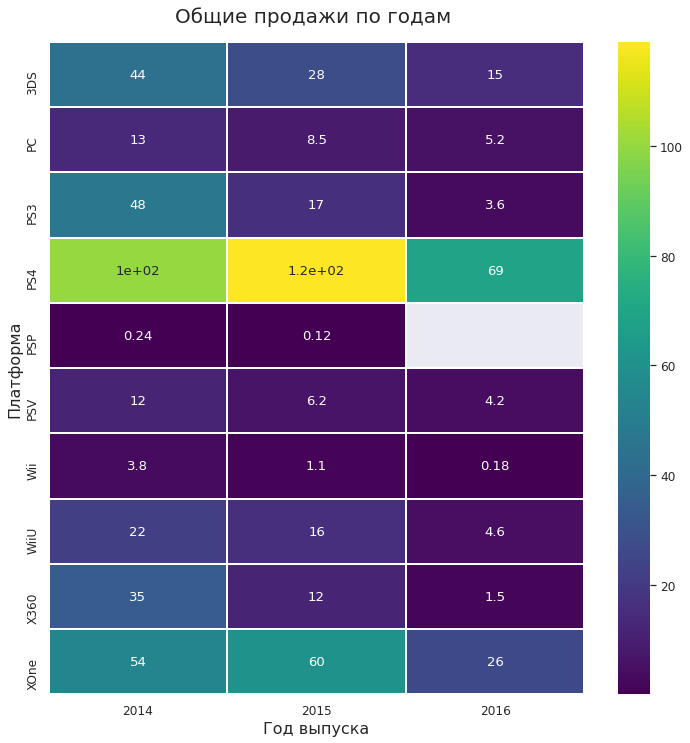

In [48]:
relevant_period = (data.query('2014 <= year_of_release <= 2016')  # беру срез данных за актуальный период
                      .pivot_table(index='platform',   # создаю сводную таблицу
                                   values="total_sales", 
                                   columns='year_of_release', 
                                   aggfunc='sum') 
)

# строю тепловую карту общих продаж для платформ за актуальный период
f, ax = plt.subplots(figsize=(12, 12))
(sns.heatmap(relevant_period, ax=ax,
             annot=True, 
             linewidths=.9, 
             cmap='viridis')
     .set_title('Общие продажи по годам ', loc='center', fontsize=20, pad=20)
)
ax.set_ylabel('Платформа', fontsize=16)
ax.set_xlabel('Год выпуска', fontsize=16);

На тепловой карте видно, что в 2016 году значения в 2 и более раз ниже в сравнении с 2015 годом. Такой резкий обвал указывает на то, что за 2016 год предоставлены не все данные. На мой взгляд, период с 2014 по 2016 годы  содержит в себе самые свежие тенденции рынка.

In [49]:
# беру срез данных для популярных платформ за актуальный период
new_data = data.query('2014 <= year_of_release <= 2016').reset_index(drop=True)
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.630000
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620001
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.680000
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.580000
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.980000
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.010000
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.010000
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.010000
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.010000


#### Поиск потенциально прибыльных платформ.

In [50]:
# группирую данные о платформах по  продажам за каждый год
grouped_new_data = new_data.groupby(['platform', 'year_of_release'], as_index=False)["total_sales"].sum()
grouped_new_data.info()
grouped_new_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         29 non-null     object 
 1   year_of_release  29 non-null     int64  
 2   total_sales      29 non-null     float32
dtypes: float32(1), int64(1), object(1)
memory usage: 812.0+ bytes


,platform,year_of_release,total_sales
0,3DS,2014,43.759998
1,3DS,2015,27.780001
2,3DS,2016,15.140000
3,PC,2014,13.280001
4,PC,2015,8.520000
5,PC,2016,5.250000
6,PS3,2014,47.759998
7,PS3,2015,16.820000
8,PS3,2016,3.600000
9,PS4,2014,100.000000


In [51]:
# считаю суммарное количесвто продаж за 3 года для каждой платформы
total_sales = (
    grouped_new_data.groupby('platform', as_index=False)['total_sales'].sum()
    .rename({'total_sales':'total_sales_sum'}, axis=1)
    .sort_values(by='total_sales_sum', ascending=False)
    .reset_index(drop=True)
    )
total_sales

,platform,total_sales_sum
0,PS4,288.149994
1,XOne,140.360001
2,3DS,86.680000
3,PS3,68.180000
4,X360,48.220001
5,WiiU,42.980000
6,PC,27.050001
7,PSV,22.400000
8,Wii,5.070000
9,PSP,0.360000


In [52]:
# объединяю датасеты 
grouped_new_data = grouped_new_data.merge(total_sales, on='platform', how='left')

# сортирую данные по общим продажам по убыванию 
grouped_new_data = grouped_new_data.sort_values(by='total_sales_sum', ascending=False)

# объединение произошло успешно, ничего не потеряно
grouped_new_data.info() 
grouped_new_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 9 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         29 non-null     object 
 1   year_of_release  29 non-null     int64  
 2   total_sales      29 non-null     float32
 3   total_sales_sum  29 non-null     float32
dtypes: float32(2), int64(1), object(1)
memory usage: 928.0+ bytes


,platform,year_of_release,total_sales,total_sales_sum
9,PS4,2014,100.000000,288.149994
11,PS4,2016,69.250000,288.149994
10,PS4,2015,118.900002,288.149994
28,XOne,2016,26.150000,140.360001
27,XOne,2015,60.139999,140.360001
26,XOne,2014,54.070000,140.360001
1,3DS,2015,27.780001,86.680000
0,3DS,2014,43.759998,86.680000
2,3DS,2016,15.140000,86.680000
8,PS3,2016,3.600000,68.180000


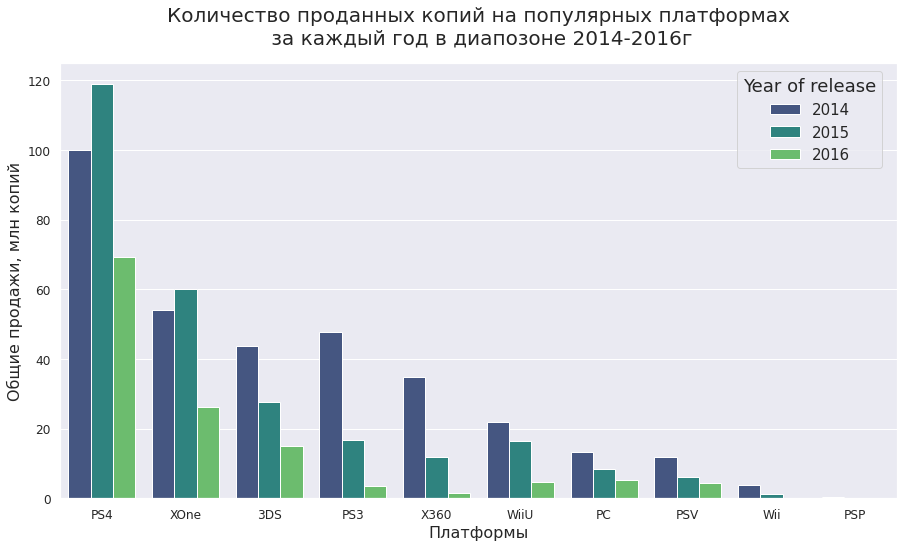

In [53]:
# Строю столбчатую диаграмму количества проданных копий на популярных платформах за каждый год в диапозоне 2013-2015
f, ax = plt.subplots(1, 1, figsize=(15, 8), sharex=True)
(sns.barplot(data=grouped_new_data, x='platform', y='total_sales', hue='year_of_release', palette='viridis')
    .set_title('Количество проданных копий на популярных платформах\n за каждый год в диапозоне 2014-2016г', loc='center', fontsize=20, pad=20)
)
ax.set_xlabel('Платформы', fontsize=16)
ax.set_ylabel('Общие продажи, млн копий', fontsize=16)
plt.legend(title='Year of release',
          title_fontsize = 18,
          loc='upper left',
          fontsize = 15,
          bbox_to_anchor=(0.8, 0, 0.1, 1)); 

In [54]:
# смотрю, сколько игр выпущено на каждой платформе за актуальный период
game_count = (new_data.groupby('platform', as_index=False)['total_sales'].count()
         .sort_values(by='total_sales', ascending=False)
         .reset_index(drop=True)
)
# game_count.columns = ['platform', 'total_count']
# display(game_count)

# смотрю, сколько игр  имеют данные об оценке от пользователей
game_count_2 = (new_data.query('user_score > 0')
         .groupby('platform', as_index=False)['total_sales'].count()
         .sort_values(by='total_sales', ascending=False)
         .reset_index(drop=True)
)
game_count_2 = game_count.merge(game_count_2, on='platform', how='left')
game_count_2.columns = ['platform', 'total_count', 'count_with_score']
game_count_2

,platform,total_count,count_with_score
0,PS4,376,242.0
1,PSV,295,73.0
2,XOne,228,165.0
3,PS3,219,98.0
4,3DS,212,55.0
5,PC,151,122.0
6,X360,111,83.0
7,WiiU,73,48.0
8,PSP,13,NaN
9,Wii,11,2.0


За исследуемые 3 года на платформах `PlayStation` было выпущено примерно в 1.5 раза больше игр, чем на  платформах `XBox`. 

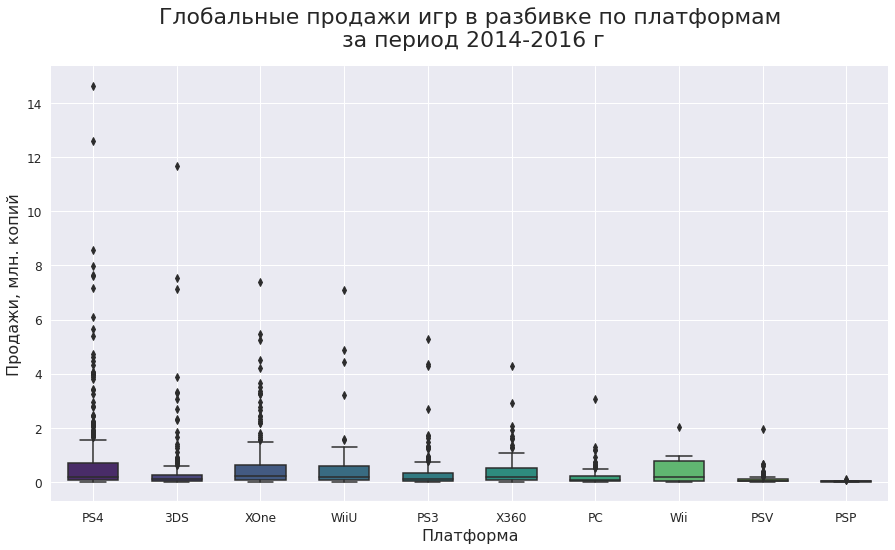

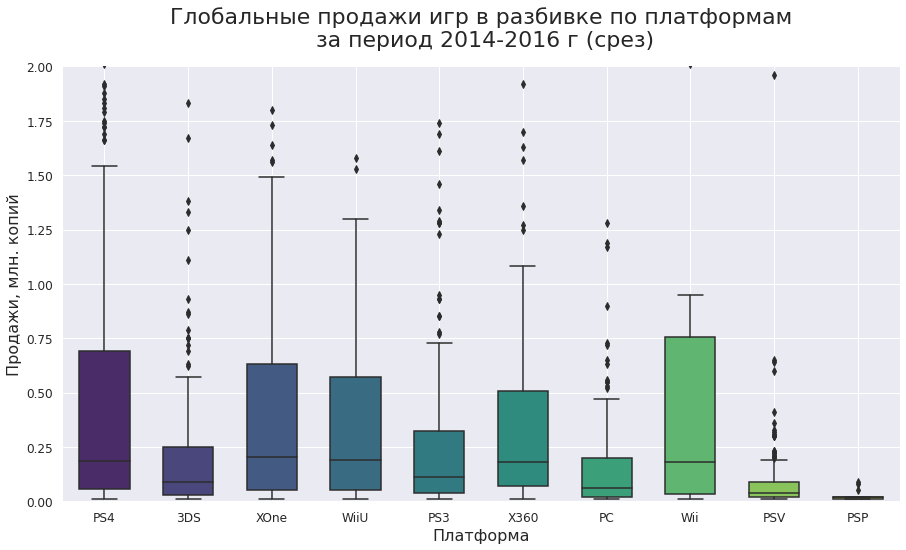

In [55]:
# строю график распределния глобальных продаж в разбивке по платформам за период 2014-2016
f, ax = plt.subplots(figsize=(15, 8))

(sns.boxplot(y='total_sales', x='platform', data=new_data,
            width=.6, palette='viridis')
    .set_title('Глобальные продажи игр в разбивке по платформам\n за период 2014-2016 г', loc='center', fontsize=22, pad=20)
)
ax.xaxis.grid(True)
ax.set_xlabel('Платформа', fontsize=16)
ax.set_ylabel('Продажи, млн. копий', fontsize=16)
sns.despine(trim=True, left=True)
plt.show()

# строю срез графика распределния глобальных продаж в разбивке по платформам за период 2014-2016
f, ax = plt.subplots(figsize=(15, 8))

(sns.boxplot(y='total_sales', x='platform', data=new_data,
            width=.6, palette='viridis')
    .set_title('Глобальные продажи игр в разбивке по платформам\n за период 2014-2016 г (срез)', loc='center', fontsize=22, pad=20)
)

ax.xaxis.grid(True)
ax.set_xlabel('Платформа', fontsize=16)
ax.set_ylabel('Продажи, млн. копий', fontsize=16)
ax.set_ylim(0,2)
sns.despine(trim=True, left=True);

Платформы `PS4`,`XOne`, `Wii`, `WiiU` являются потенциально прибыльными платформами по нескольким причинам:
- на данных платформах выпускается стабильно большое количество игр
- общие продажи игр стабильно высокие, на барплоте можно увидеть, что имеется тенденция к росту продаж год от года
- Медиана продаж на данных платформах выше, чем на остальных платформах.


#### Как влияют на продажи внутри платформ отзывы пользователей и критиков?

In [56]:
# создаю функцию для создания диаграммы рассеяния
def make_corr(platform):
    df = new_data.query(f'platform == "{platform}"')
    сorr_user_sales = df['total_sales'].corr(df['user_score'])
    сorr_critic_sales = df['total_sales'].corr(df['critic_score'].astype('float32'))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), sharex=False)
    sns.despine(f, left=True, bottom=True)

    x1 = df['user_score']
    x2 = df['critic_score']
    y1 = df['total_sales']

    (sns.scatterplot(data=df, x=x1, y=y1,
                    palette='viridis',
                    ax=ax1, sizes=(1, 1), linewidth=0.3)
        .set_title(f'Зависимость продаж игр на \n  платформе {platform} от оценок пользователей', loc='center', fontsize=16, pad=20)
    )
    ax1.set_ylabel('Продажи, млн. копий', fontsize=14)
    ax1.set_xlabel(f'Оценка пользователей\nкоэффицент корреляции = {сorr_user_sales:.2f}', fontsize=14)
    
    (sns.scatterplot(data=df, x=x2, y=y1,
                    palette='virids',
                    ax=ax2, linewidth=0.5)
        .set_title(f'Зависимость продаж игр на\n платформе {platform} от оценок критиков', loc='center', fontsize=16, pad=20)
    )
    ax2.set_ylabel('Продажи, млн. копий', fontsize=14)
    ax2.set_xlabel(f'Оценка критиков\nкоэффицент корреляции = {сorr_critic_sales:.3f}', fontsize=14);

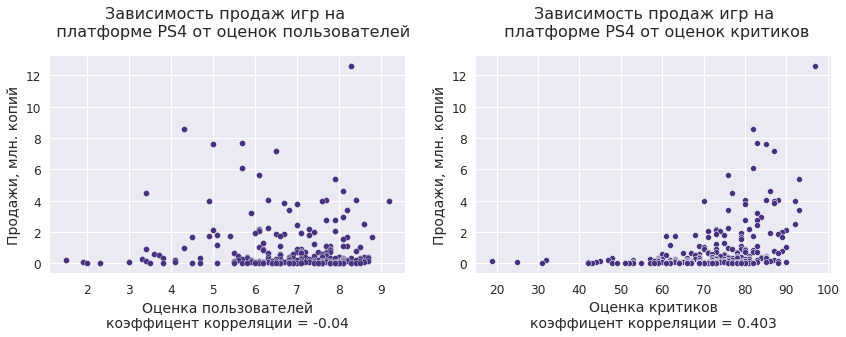

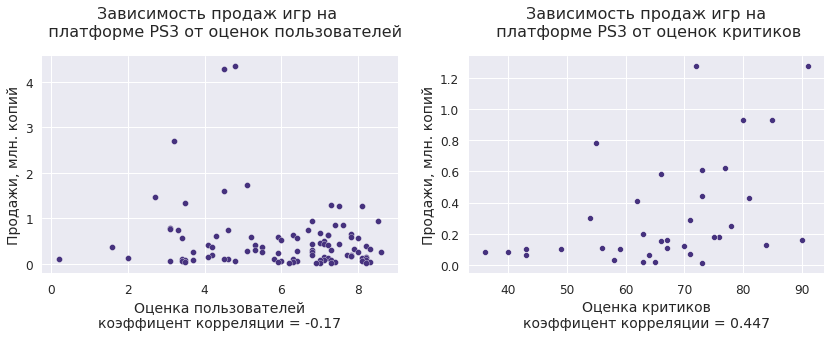

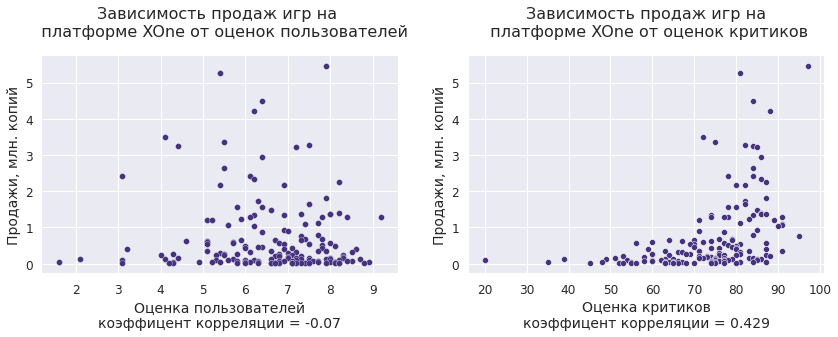

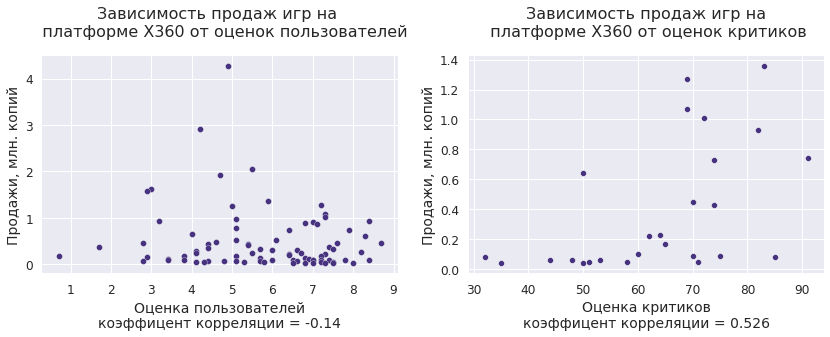

In [57]:
# строю диаграммы рассеяния для 4 популярных платформ
make_corr('PS4') 
make_corr('PS3')
make_corr('XOne')
make_corr('X360')

Между продажами на самых популярных плтаформах и оценкой пользователей нет зависимости , так как коэффицент корреляции для каждой платформы практически равен нулю.
Между оценкой критиков и продажами на платформах существует положительная корреляция, но она очень слабая, не всегда высокие оценки критиков приводят к высоким продажам.

#### Распределение игр по жанрам.

Я решила посмотреть, как распределены игры по жанрам для всех регионах.

In [58]:
# Строю сводную таблицу: распределение игр и общих продаж по жанрам
genre = new_data.pivot_table(index='genre', aggfunc={'total_sales':['count', 'median']})
genre.columns = ['count', 'median_sales']
genre = genre.sort_values(by='median_sales', ascending=False)
genre

,count,median_sales
genre,,
Shooter,128,0.515
Sports,161,0.180
Platform,38,0.140
Fighting,60,0.125
Role-Playing,221,0.110
Simulation,44,0.100
Misc,113,0.090
Action,619,0.090
Racing,69,0.090


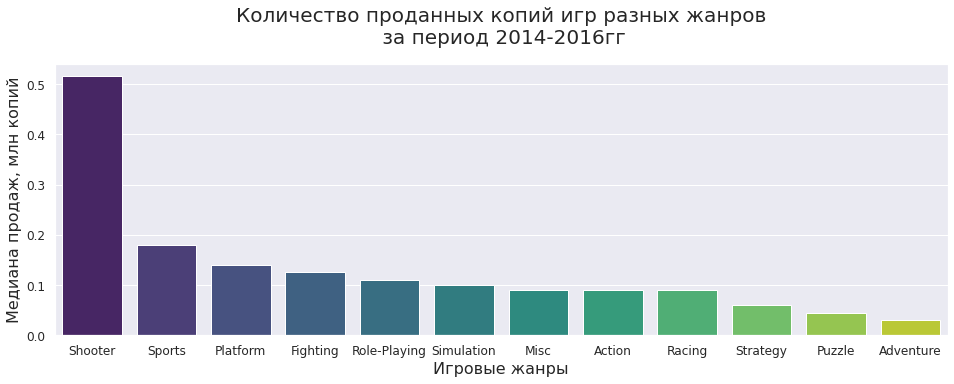

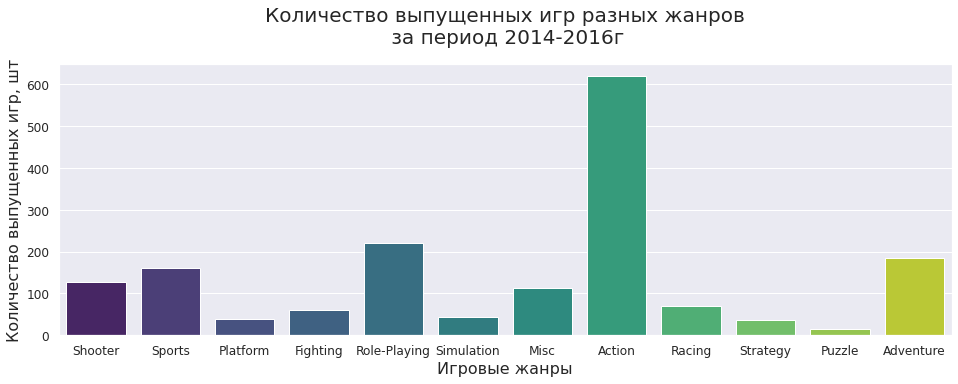

In [59]:
# Смотрю, как распределены жанры по медиане продаж за актуальный период
f, ax = plt.subplots(1, 1, figsize=(16, 5), sharex=True)
(sns.barplot(data=genre, x=genre.index, y='median_sales', palette='viridis')
    .set_title('Количество проданных копий игр разных жанров\n за период 2014-2016гг', loc='center', fontsize=20, pad=20)
)
ax.set_xlabel('Игровые жанры', fontsize=16)
ax.set_ylabel('Медиана продаж, млн копий', fontsize=16);

# Смотрю, как распределены жанры по количеству игр разных жанров, выпущенных за актуальный период
f, ax = plt.subplots(1, 1, figsize=(16, 5), sharex=True)
(sns.barplot(data=genre, x=genre.index, y='count', palette='viridis')
    .set_title('Количество выпущенных игр разных жанров\n за период 2014-2016г', loc='center', fontsize=20, pad=20)
)
ax.set_xlabel('Игровые жанры', fontsize=16)
ax.set_ylabel('Количество выпущенных игр, шт', fontsize=16);

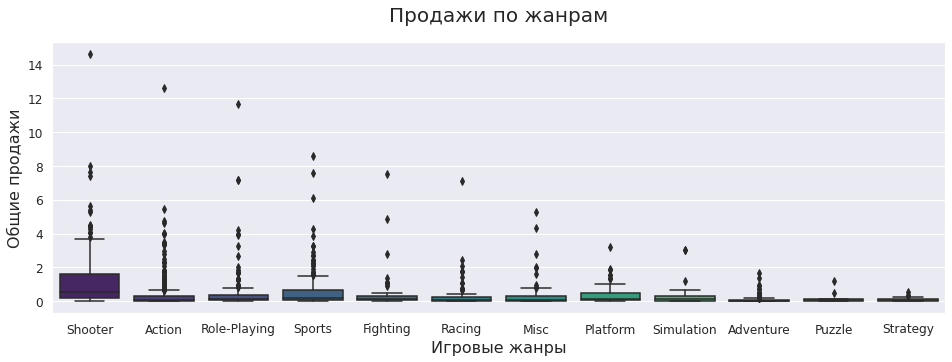

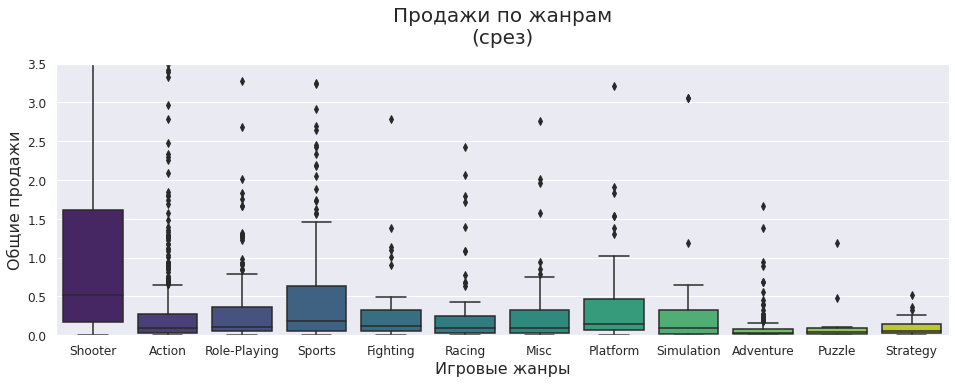

In [60]:
# Строю боксплот
f, ax = plt.subplots(1, 1, figsize=(16, 5), sharex=True)
(sns.boxplot(data=new_data, x='genre', y='total_sales', palette='viridis')
    .set_title('Продажи по жанрам', loc='center', fontsize=20, pad=20)
)
ax.set_xlabel('Игровые жанры', fontsize=16)
ax.set_ylabel('Общие продажи', fontsize=16);

# Строю срез
f, ax = plt.subplots(1, 1, figsize=(16, 5), sharex=True)
(sns.boxplot(data=new_data, x='genre', y='total_sales', palette='viridis')
    .set_title('Продажи по жанрам\n(срез)', loc='center', fontsize=20, pad=20)
)
ax.set_xlabel('Игровые жанры', fontsize=16)
ax.set_ylabel('Общие продажи', fontsize=16)
ax.set_ylim(0, 3.5);

Самый популярный и прибыльный жанр: `Shooter`.
Несмотря на то, что игр в жанре `Shooter` выпускается не так много, эти игры очень хорошо продаются. Медиана проданных копий игр в жанре `Shooter` резко отличается от игр в других жанрах

Игры в жанре `Advanture`, `Action`,  продаются плохо, несмотря на больше количество игр, выпускаемых в данных жанрах.

### Шаг 6. Портрет пользователя каждого региона

#### Самые популярные платформы.

Я решила посмотреть, существуют ли различия в популярности платформ в зависимости от региона. 

In [61]:
# Создаю своодную таблицу для платформ с подсчетом продаж в разных регионах
popular_platforms = (new_data.pivot_table(index='platform', 
                                          values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                          aggfunc='sum')
                    )
popular_platforms = popular_platforms.sort_values(by='na_sales')
popular_platforms

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PSP,0.000000,0.360000,0.000000,0.00
Wii,2.590000,0.000000,2.080000,0.40
PSV,3.530000,14.540000,2.520000,1.81
PC,17.969999,0.000000,7.230000,1.85
WiiU,13.150000,7.310000,19.360001,3.16
PS3,25.539999,11.220000,22.049999,9.37
3DS,16.120001,44.240002,22.639999,3.68
X360,15.490000,0.080000,28.299999,4.35
XOne,46.250000,0.320000,81.269997,12.52


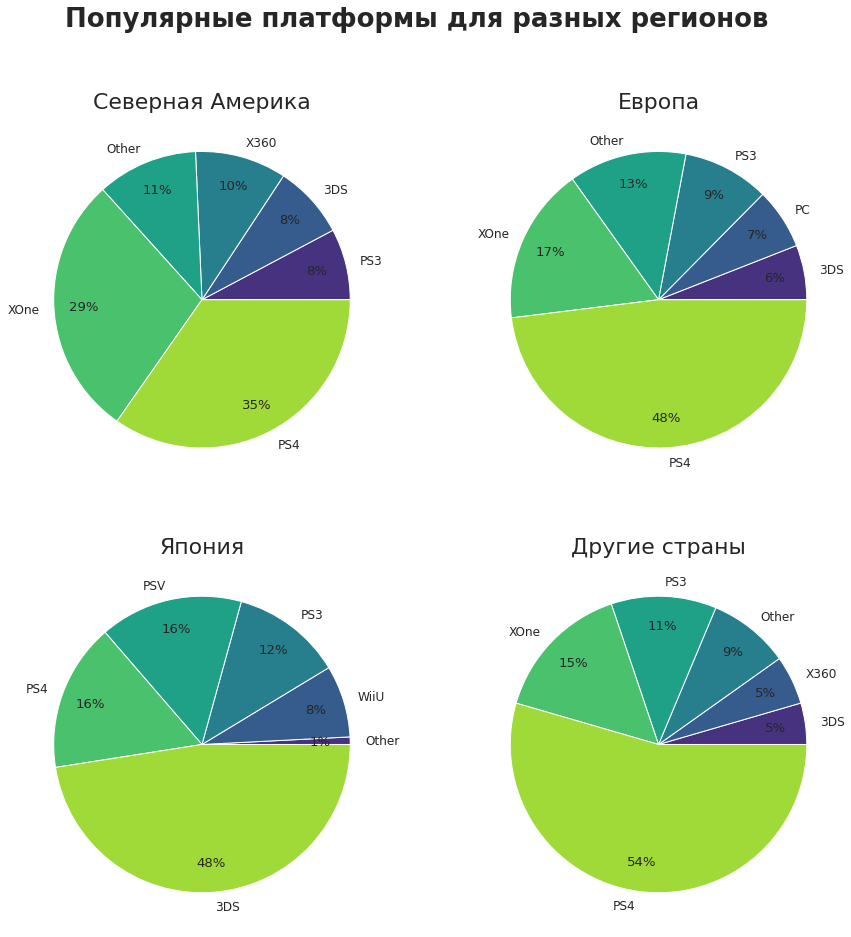

In [62]:
# Строю круговые диаграммы распределения игр по жанрам в разных регионах
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
ax = axes.ravel()
colors = sns.color_palette('viridis')[0:]
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
titles = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']
for i in range(4):
    df = (new_data.pivot_table(index='platform', 
                          values = sales[i], 
                          aggfunc='sum')
                         .sort_values(by=sales[i], ascending=False))
    df['platform_group'] = df.index.map(lambda x: x if x in list(df.index[:5]) else 'Other')
    df = df.set_index('platform_group')
    df = df.groupby('platform_group')[sales[i]].sum().sort_values(ascending=True)
    df.plot(
        kind='pie',
        y = sales[i], 
        colors = colors,
        autopct='%.0f%%',
        pctdistance=0.8,
        ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(titles[i], fontsize=22);
    
plt.suptitle('Популярные платформы для разных регионов', fontsize=26, fontweight='bold')

plt.show()

Круговые диаграммы наглядно демонстрируют, что для разных регионов популярны разные платформы.
- Топ-5 платформ для пользователей из Северной Америки:
     1. `PS4`
     2. `XOne`
     3. `X360`  
     4. `PS3`
     5. `3DS`
     
     
- В Европе более 50% продаж забирают платформы компании `PlayStation`.
- Топ-5 платформ для пользователей из Европы:
     1. `PS4`
     2. `XOne` 
     3. `PS3`
     4. `PC`
     5. `3DS`
     
     
- Отличается от всех регионов Япония: 48% рынка занято играми на платформах `Nintendo`(`3DS`), а платформы на базе `XBox`  абсолютно не популярны.
- Топ-3 платформ для пользователей из Японии:
     1. `3DS`
     2. `PS4` 
     3. `PSV`
     4. `PS3`
     5. `WiiU`

#### Самые популярные жанры.

Я решила посмотреть, существуют ли различия в популярности жанров в зависимости от региона. 

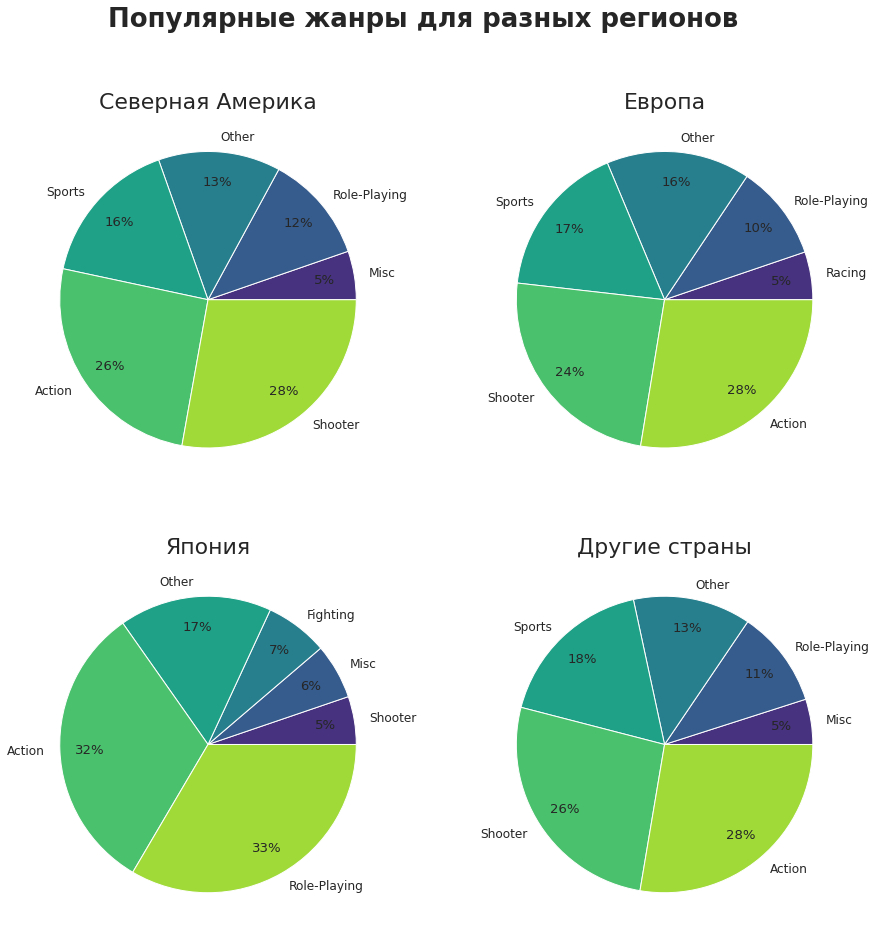

In [63]:
# Строю круговые диаграммы распределения игр по жанрам в разных регионах
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
ax = axes.ravel()
colors = sns.color_palette('viridis')[0:]
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
titles = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']
for i in range(4):
    df = (new_data.pivot_table(index='genre', 
                          values = sales[i], 
                          aggfunc='sum')
                         .sort_values(by=sales[i], ascending=False))
    df['genre_group'] = df.index.map(lambda x: x if x in list(df.index[:5]) else 'Other')
    df = df.set_index('genre_group')
    df = df.groupby('genre_group')[sales[i]].sum().sort_values(ascending=True)
    df.plot(
        kind='pie',
        y = sales[i], 
        colors = colors,
        autopct='%.0f%%',
        pctdistance=0.8,
        ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(titles[i], fontsize=22);
    
plt.suptitle('Популярные жанры для разных регионов', fontsize=26, fontweight='bold')

plt.show()

Круговые диаграммы наглядно демонстрируют, что для разных регионов популярны игры разных жанры.
- В Северной Америке и прочих странах топ-5 жанров следующий:
    1. `Shooter`
    2. `Action`
    3. `Sports`
    4. `Role-Playing`
    5. `Misc`
    
    
- В Европе топ-5 жанров:
    1. `Action`
    2. `Shooter`
    3. `Sports`
    4. `Role-Playing`
    5. `Racing`
    
    
- Отличается от всех регионов Япония: на первом месте по популярности  `Role-Playing`, а `Sport` и `Shooter` - абсолютно не популярны.
- В Японии топ-5 жанров:
    1. `Role-Playing`
    2. `Action`
    3. `Fighting`
    4. `Misc`
    5. `Simulation`

#### Влияние  рейтинга ESRB на продажи в регионах

In [64]:
# смотрю количесвто уникальных значений в столбц rating
new_data['rating'].value_counts()

unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

In [65]:
# Создаю таблицу, из которой удобно брать данные для построения графика
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
regions = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']
for i in range(4):
    df = (new_data.pivot_table(index='rating', 
                          values = sales[i], 
                          aggfunc='sum')
                         .sort_values(by=sales[i], ascending=False))
    df['country'] = regions[i]
    df = df.rename(columns={sales[i]:'sales'})
    rating_sales = df if i == 0 else pd.concat([rating_sales, df])
        
display(rating_sales)

,sales,country
rating,,
M,96.419998,Северная Америка
unknown,64.720001,Северная Америка
E,50.740002,Северная Америка
T,38.950001,Северная Америка
E10+,33.230000,Северная Америка
M,93.440002,Европа
unknown,58.950001,Европа
E,58.060001,Европа
T,34.070000,Европа


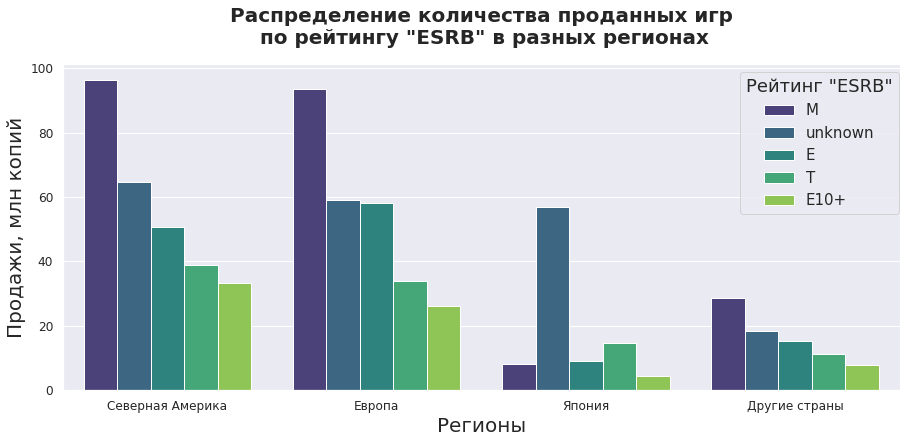

In [66]:
# Строю барплот распределения количества проданных игр по рейтингу "ESRB" в разных регионах
f, ax = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
(sns.barplot(data=rating_sales, x='country', y='sales', hue=rating_sales.index, palette='viridis')
    .set_title('Распределение количества проданных игр\n по рейтингу "ESRB" в разных регионах', 
               loc='center',
               fontweight='bold', 
               fontsize=20, 
               pad=20)
)
ax.set_xlabel('Регионы', fontsize=20)
ax.set_ylabel('Продажи, млн копий', fontsize=20)
plt.legend(title='Рейтинг "ESRB"',
          title_fontsize = 18,
          loc='upper left',
          fontsize = 15,
          bbox_to_anchor=(0.8, 0, 0.1, 1));

На графике видно, что рейтинг `ESRB` влияет на продажи игр в разных регионах.
- в Японии активнее всего продаются игры с неизвестным рейтингом, это значит, что в этом регионе скорее всего используется другой возрастной рейтинг для маркировки игр.
- Для остальных регионов активнее всего покупают игры с рейтингом `M ('Mature')` — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 
- На втором месте по количесвту проданных копий - игры с неизвестным рейтингом.
- На третьем - игры с рейтингом `E ('Everyone')` — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым.

### Шаг 7. Проверка гипотез

#### Одинаковые ли средние пользовательские рейтинги платформ 'Xbox One' и 'PC'?

Предположим, что средние пользовательские рейтинги игр на платформах 'Xbox One' и 'PC' равны. Тогда нулевую гипотезу можно сформулировать так:

`H0: средние пользовательские рейтинги игр на платформах 'Xbox One' и 'PC' равны`

Альтернативную гипотезу сформулировать можно так:

`H1: средние пользовательские рейтинги игр на платформах 'Xbox One' и 'PC' не равны`

Так как в топ популярных платформ не попала платформа `PC`, я использую датафрейм со всеми данными, а потом беру срез с актуальными данными.

In [67]:
xone = (new_data.dropna(subset=['user_score'])
                .query('(platform == "XOne") & (2014 <= year_of_release <= 2016)')
                .reset_index(drop=True)
       )
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
1,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
2,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
3,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
4,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,<NA>,6.8,T,0.01
161,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
162,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
163,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,<NA>,6.6,E,0.01


In [68]:
# создаю датасет, чтобы собрать выборку значений пользовательского рейтинга для игр на платформе PC
pc = (new_data.dropna(subset=['user_score'])
              .query('(platform == "PC") & (2014 <= year_of_release <= 2016)')
              .reset_index(drop=True)
     )
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28
2,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96,7.9,M,1.17
3,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71,5.7,M,0.90
4,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85,5.9,M,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Fallout Anthology,PC,2015,Action,0.00,0.01,0.0,0.00,<NA>,8.3,unknown,0.01
118,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79,6.8,E,0.01
119,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78,7.9,E,0.01
120,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,<NA>,1.4,E,0.01


In [69]:
# Проверяю гипотезу

score_list_xone = list(xone['user_score']) #  список оценок пользователей на игры на платформе XOne
score_list_pc = list(pc['user_score']) #  список оценок пользователей на игры на платформе PC

# считаю среднюю оценку пользователей на игры на платформе XOne
print(f'Средняя оценка пользователей на игры на платформе XOne = {np.mean(score_list_xone)}')
# считаю среднюю оценку пользователей на игры на платформе PC
print(f'Средняя оценка пользователей на игры на платформе PC = {np.mean(score_list_pc)}')

alpha = .01  # все гипотезы я буду проверять по статистической значимости, равной 1 %

results = st.ttest_ind(xone['user_score'], pc['user_score'])
print(f'p-value: {results.pvalue}')  # считаю p-value

# Проверяю гипотезу
if results.pvalue < alpha:
    print('Можно опровергнуть гипотезу, что средние пользовательские рейтинги игр на платформах "Xbox One" и "PC" равны')
else:
    print('Нельзя опровергнуть гипотезу, что средние пользовательские рейтинги игр на платформах "Xbox One" и "PC" равны')

Средняя оценка пользователей на игры на платформе XOne = 6.594545459024834
Средняя оценка пользователей на игры на платформе PC = 6.298360683878914
p-value: 0.10450648833224654
Нельзя опровергнуть гипотезу, что средние пользовательские рейтинги игр на платформах "Xbox One" и "PC" равны


Вероятность того, что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны при условии, что нулевая гиспотеза верна, стремится к единице.
Следовательно, можно сделать вывод, что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны.

#### Отличаются ли средние пользовательские рейтинги жанров Action  и Sports?

Предположим, что средние пользовательские рейтинги жанров 'Action' и 'Sports' равны. Тогда нулевую гипотезу можно сформулировать так:

`H0: средние пользовательские рейтинги жанров 'Action' и 'Sports' равны`

Альтернативную гипотезу сформулировать можно так:

`H1: средние пользовательские рейтинги жанров 'Action' и 'Sports' не равны`

In [70]:
# создаю датасет, чтобы собрать выборку значений пользовательского рейтинга для игр в жанре Action
action = new_data.dropna(subset=['user_score']).query('genre =="Action"').reset_index(drop=True)
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620001
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.470000
2,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.620000
3,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80,6.3,M,4.050000
4,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70,4.9,M,3.960000
...,...,...,...,...,...,...,...,...,...,...,...,...
292,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,<NA>,6.8,T,0.010000
293,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.010000
294,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.010000
295,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,unknown,0.010000


In [71]:
# создаю датасет, чтобы собрать выборку значений пользовательского рейтинга для игр в жанре Sports
sports = new_data.dropna(subset=['user_score']).query('genre =="Sports"').reset_index(drop=True)
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
1,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
2,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
3,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,<NA>,4.5,E,4.28
4,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87,6.7,E10+,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
122,NBA 2K17,PC,2016,Sports,0.00,0.01,0.00,0.00,90,6.3,E,0.01
123,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,<NA>,8.8,E,0.01
124,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73,6.9,E,0.01
125,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,<NA>,1.4,E,0.01


In [72]:
# Проверяю гипотезу

score_list_action = list(action['user_score']) #  список оценок пользователей на игры в жанре action
score_list_sports = list(sports['user_score']) #  список оценок пользователей на игры в жанре sports

# считаю среднюю оценку пользователей на игры в жанре action
print(f'Средняя оценка пользователей на игры в жанре action = {np.mean(score_list_action)}')

# считаю среднюю оценку пользователей на игры в жанре sports
print(f'Средняя оценка пользователей на игры в жанре sports = {np.mean(score_list_sports)}')

alpha = .01  # все гипотезы я буду проверять по статистической значимости, равной 1 %

results = st.ttest_ind(action['user_score'], sports['user_score'])
print(f'p-value: {results.pvalue}')  # считаю p-value

# Проверяю гипотезу
if results.pvalue < alpha:
    print('Можно опровергнуть гипотезу, что средние пользовательские рейтинги для игр в жанре "Action" и "Sports" равны')
else:
    print('Нельзя опровергнуть гипотезу, что средние пользовательские рейтинги для игр в жанре "Action" и "Sports" равны')

Средняя оценка пользователей на игры в жанре action = 6.760606079390555
Средняя оценка пользователей на игры в жанре sports = 5.225196847882796
p-value: 2.871146400695882e-19
Можно опровергнуть гипотезу, что средние пользовательские рейтинги для игр в жанре "Action" и "Sports" равны


На основании имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

### Шаг 8. Общий вывод

**Я ознакомилась с данными из выгруженного датафрейма и произвела предобработку данных.**

1. Я привела названия столбцов к стандартному "змеиному" регистру.

2. Изменила тип данных, числовые значения перевела в 32-битный тип для уменьшения размера датафрейма.

3. В столбцах `name` и `genre` есть 2 пропущенных значения. Заполнить пропуски невозможно, а без этих значений строки не информативны, поэтому я решила удалить их.

4. Значения в `year_of_release` год релиза игр  с 1980 по 2016 год. Я построила боксплот и гистограмму, на которых видно, что аномальных значений нет. В столбце `year_of_release` присутствуют пропуски. Так как доля пропущенных строк от общего числа строк равна 0.16, я удалила строки. 
    Возможные причины появления пропусков в столбце  `year_of_release`:
    
    - техническая ошибка в сборе данных, потеря части данных;
    - в источниках, из которых собрались данные, не было информации о годе выпуска игры;   
    
    
5. В столбце `critic_score` много пропущенных значений. Заполнить пропуски не представляется возможным, поэтому я оставляю все, как есть. Причин в том, почему могли появиться пропуски в данном столбце, несколько:

    - техническая ошибка в сборе данных, потеря части данных;
    - возможно, некоторые игры недостаточно популярны, чтобы их могли оценить критики;
    - в источниках, из которых собрались данные, не было информации об оценках критиков;
    
    
6. Я изучила, какие уникальные значения встречаются в столбце `user_score`. По логике, в данном столбце должны храниться только числовые значения, но довольно часто встречается `tbd`. `TBD (To Be Determined)` - это аббревиатура, которая  помогает быстро и эффективно передать информацию о том, что конкретный аспект еще не установлен и требует дополнительного решения или информации. В нашем контексте `tbd` - это отстутствие данных. Поэтому я заменила `tbd` на пропуски. Изменила тип данных с `object` на `float32`. Возможные причины появления пропусков в данном столбце несколько:

    - техническая ошибка в сборе данных, потеря части данных;
    - в источниках, из которых собрались данные, не было информации об оценках пользователей;
    

7. Я посмотрела, сколько раз встречаются уникальные значения в столбце `rating`. Я изучила рейтинг от организации ESRB.  `K-A for Kids to Adults` - это рейтинг для игр, содержащих контент, пригодный для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в `E`. Так как рейтинги `K-A` и `E`по сути означают одно и то же, а строк с `K-A` мало, я думаю, что можно заменить `K-A` на `E`.  Так же, я почитала количесвто пропусков в столбце `rating`. Заменить пропуски невозможно, а удалять такое количесвто строк не целесообразно, потеряется много данных. Поэтому оставляю пропуски не заполненными. Возможные причины пропусков:

    - технический сбой;
    - в источниках, из которых собрались данные, не было информации о возрастном рейтинге ESRB.
    
    
8. Проверила данные на наличие явных дубликатов. Изучила уникальные значения в столбцах `genre`,`platform` и `year_of_release `на возможные неявные дубликаты. Удалила неявные дубликаты.

**Исследовала данные:**

- Вторая половина 2000-ых стала самой выдающейся в плане выпуска игр - выпускалось более 1000 игр в год, а в первую половину 2010-ых выпуск игр сильно сократился до 600 игр в год. На мой взгляд, в данном исследовании важны данные за последние 5 лет, так как нам важен актуальная картина для прогнозирования тенденций на 2017 год. 
- Большинство платформ в среднем существуют 10-12 лет, новую усовершенствованную платформу создают в среднем за 6-7 лет от запуска платформы прошлого поколения. 
- На мой взгляд, наиболее оптимальный период для исследования -  это данные за 2014-2016 годы.
- Платформы `PS4` и `XOne` являются потенциально прибыльными платформами по нескольким причинам:
    - на данных платформах выпускается стабильно большое количество игр
    - общие продажи игр стабильно высокие, на барплоте можно увидеть, что имеется тенденция к росту продаж год от года
    - Медиана продаж на данных платформах выше, чем на остальных платформах.
- Оценки пользователей никак не влияют на продажи игр. А вот к оценкам критиков пользователи прислушиваются, чем выше оценки критиков, тем выше вероятность высоких продаж. Но зависимость достаточно слабая,не всегда высокие оценки критиков приводят к высоким продажам.
- Самый популярный жанр: `Shooter`. Несмотря на то, что игр в жанре `Shooter` выпускается не так много, эти игры очень хорошо продаются. Медиана проданных копий игр в жанре `Shooter` резко отличается от игр в других жанрах. Игры в жанре `Advanture`, `Action`,  продаются плохо, несмотря на больше количество игр, выпускаемых в данных жанрах.

**Составила портрет пользователя каждого региона**

- Топ-5 платформ для пользователей из Северной Америки:
     1. `PS4`
     2. `XOne`
     3. `X360`  
     4. `PS3`
     5. `3DS`
     
  
- Топ-5 платформ для пользователей из Европы:
     1. `PS4`
     2. `XOne` 
     3. `PS3`
     4. `PC`
     5. `3DS`
     
     
- Отличается от всех регионов Япония: 48% рынка занято играми на платформах `Nintendo`(`3DS`), а платформы на базе `XBox`  абсолютно не популярны.
- Топ-3 платформ для пользователей из Японии:
     1. `3DS`
     2. `PS4` 
     3. `PSV`
     4. `PS3`
     5. `WiiU`

- В Северной Америке и прочих странах топ-5 жанров следующий:
    1. `Shooter`
    2. `Action`
    3. `Sports`
    4. `Role-Playing`
    5. `Misc`
    
    
- В Европе топ-5 жанров:
    1. `Action`
    2. `Shooter`
    3. `Sports`
    4. `Role-Playing`
    5. `Racing`
    
    
- Отличается от всех регионов Япония: на первом месте по популярности  `Role-Playing`, а `Sport` и `Shooter` - абсолютно не популярны.
- В Японии топ-5 жанров:
    1. `Role-Playing`
    2. `Action`
    3. `Fighting`
    4. `Misc`
    5. `Simulation`
    
- в Японии активнее всего продаются игры с неизвестным рейтингом, это значит, что в этом регионе скорее всего используется другой возрастной рейтинг для маркировки игр.
- Для остальных регионов активнее всего покупают игры с рейтингом `M ('Mature')` — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 
- На втором месте по количесвту проданных копий - игры с неизвестным рейтингом.
- На третьем - игры с рейтингом `E ('Everyone')` — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым.    

**Проверила гипотезы**

- Вероятность того, что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны при условии, что нулевая гиспотеза верна, стремится к единице. Следовательно, можно сделать вывод, что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны.
- Вероятность того, что средние пользовательские рейтинги для игр в жанре `Action` и `Sports` равны при условии, что нулевая гиспотеза верна, стремится к нулю.Следовательно, можно сделать вывод, что пользовательские рейтинги для игр в жанре `Action` и `Sports` различаются.


**Прогноз на 2017 и рекомендации**
1. Оптимально проводить рекламную кампанию в Северной Америке и Европе, в этих регионах предпочтения в выборе платформ и жанров у пользователей очень похожи, так же, в основном используется рейтинг `ESRB` для маркировки возрастных ограничений. Пользователи из Японии сильно отличаются от пользователей от всех других регионов, так же, так как этот регион относительно Америки и Европы гораздо меньше по числу пользователей.
1. Платформы `PS4` и `XOne` являются потенциально прибыльными платформами по нескольким причинам:
    - на данных платформах выпускается стабильно большое количество игр
    - общие продажи игр стабильно высокие, на барплоте можно увидеть, что имеется тенденция к росту продаж год от года
    - медиана продаж на данных платформах выше, чем на остальных платформах.
    - занимают первые места по популярности в Северной Америке и Европе.
    
2. Игры в жанре `Shooter` и  `Action` - самые популярные и прибыльные в Северной Америке и Европе. Несмотря на то, что жанр `Action` входит в топ-5 популярных жанров во всех регионах, продаются игры в данном жанре плохо. Поэтому следует отдать предпочтение играм в жанре `Shooter`.
   
3. Пользователи из этих регионов чаще преобретают игры с рейтингом M ('Mature') — «От 17 лет».

4. Люди абсолютно не обращают внимания на оценки пользователей, чаще смотрят на оценки критиков, чем выше  рейтинг критиков, тем выше вероятность покупки игры, но эта зависимость довольно слабая.